**Tool Showcase**
=======

<font color = 'E3A440'>*Webscraping tutorial*</font>
=============

This tutorial is a short hands-on tutorial to introduce the webscraping pratice.
It was presented during the <font color = 'E3A440'>Tool Showcase</font> at [P4IE Conference - Measuring Metrics that Matter](https://event.fourwaves.com/p4ie/pages), which took place on 9-10-11 May 2022 at the *Hilton Garden Inn*, in Ottawa.

Structure of the showcase:
1. General Framework
2. Web scraping step by step
3. Launch a program 

This tutorial cannot be considered as ehaustif of the domain. 

### Author: 
- Davide Pulizzotto <davide.pulizzotto@polymtl.ca>

### Table of Contents

- [Section 1. Introduction](#introduction)
- [Section 2. Step by step](#step-by-step)
- [Section 3. Launch a program](#Launch)


<a id='introduction'></a>
# <font size = '6' color='E3A440'>Section 1. Introduction</font>



[Journal of Responsible Innovation](https://www.tandfonline.com/action/journalInformation?show=aimsScope&journalCode=tjri20) by Taylor & Francis.


## 0.1 Preparation of Colab Virtual Machine

In order to work correctly on Colab, we need to prepare the environment by executing two main steps:
1. Download data from the GitHub project 
2. Install package to run code of this workshop

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

<a id='step-by-step'></a>
# <font size = '6' color='E3A440'>Section 2. Step by step</font>



In [8]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}


## 2.1 Make the request to the server

In [74]:
response_req = requests.get('https://www.tandfonline.com/toc/tjri20/9/1?nav=tocList',
                            headers = headers,
                            timeout = 10)

In [75]:
response_req.status_code

200

## 2.2 Parse the response's content

In [76]:
if response_req.status_code == 200:
    soup = BeautifulSoup(response_req.content, features="lxml")

## 2.3 Go into action

All tags that contain informaitons about articles of the issue

### 2.3.1 Get informaiton by tag

In [ ]:
# Year
title_issue_el = soup_issue.find("div", "toc-title")
year = re.search("(\()([0-9]{4})(\))", title_issue_el.text).groups()[1]
print(f"\n{title_issue_el.text")

### 2.3.2 Get all occurences of the same tag

here

In [77]:
list_article = soup.findAll('div', attrs={"class":re.compile("art_title linkable")})

ss

In [80]:

for x in list_article:
    print(x.text)

Engaging with societal challenges in responsible innovation
What’s wrong with global challenges?
Co-creation in support of responsible research and innovation: an analysis of three stakeholder workshops on nanotechnology for health
Innovation and equality: an approach to constructing a community governed network commons
Nanoscientists’ perceptions of serving as ethical leaders within their organization: Implications from ethical leadership for responsible innovation
The uses of grand challenges in research policy and university management: something for everyone
Toward institutionalization of responsible innovation in the contemporary research university: insights from case studies of Arizona State University
Looking beyond the ‘horizon’ of RRI: moving from discomforts to commitments as early career researchers
Responsibility and innovation
New horizons, old friends: taking an ‘ARIA in six keys’ approach to the future of R(R)I
Against bureaucrapitalism: a response to Shanley and collea

Save urls for next processing

In [90]:
list_url_articles = []
for art_element in list_article:
    for link_ in art_element.findAll("a", href=True):
        print(link_)
        list_url_articles.append(link_['href'])


/doi/full/10.1080/23299460.2022.2063910
/doi/full/10.1080/23299460.2021.2000130
/doi/full/10.1080/23299460.2021.1994195
/doi/full/10.1080/23299460.2022.2043681
/doi/full/10.1080/23299460.2022.2043630
/doi/full/10.1080/23299460.2022.2040870
/doi/full/10.1080/23299460.2022.2042983
/doi/full/10.1080/23299460.2022.2049506
/doi/full/10.1080/23299460.2022.2050570
/doi/full/10.1080/23299460.2022.2050592
/doi/full/10.1080/23299460.2022.2055993


In [82]:
list_url_articles

['/doi/full/10.1080/23299460.2022.2063910',
 '/doi/full/10.1080/23299460.2021.2000130',
 '/doi/full/10.1080/23299460.2021.1994195',
 '/doi/full/10.1080/23299460.2022.2043681',
 '/doi/full/10.1080/23299460.2022.2043630',
 '/doi/full/10.1080/23299460.2022.2040870',
 '/doi/full/10.1080/23299460.2022.2042983',
 '/doi/full/10.1080/23299460.2022.2049506',
 '/doi/full/10.1080/23299460.2022.2050570',
 '/doi/full/10.1080/23299460.2022.2050592',
 '/doi/full/10.1080/23299460.2022.2055993']

In [85]:
for url_article in list_url_articles:
    url_art_temp = f"https://www.tandfonline.com{url_article}"
    print(url_art_temp)


https://www.tandfonline.com/doi/full/10.1080/23299460.2022.2063910
https://www.tandfonline.com/doi/full/10.1080/23299460.2021.2000130
https://www.tandfonline.com/doi/full/10.1080/23299460.2021.1994195
https://www.tandfonline.com/doi/full/10.1080/23299460.2022.2043681
https://www.tandfonline.com/doi/full/10.1080/23299460.2022.2043630
https://www.tandfonline.com/doi/full/10.1080/23299460.2022.2040870
https://www.tandfonline.com/doi/full/10.1080/23299460.2022.2042983
https://www.tandfonline.com/doi/full/10.1080/23299460.2022.2049506
https://www.tandfonline.com/doi/full/10.1080/23299460.2022.2050570
https://www.tandfonline.com/doi/full/10.1080/23299460.2022.2050592
https://www.tandfonline.com/doi/full/10.1080/23299460.2022.2055993


### 2.3.3 Enter in the article a new web page

In [ ]:
url_article = list_url_articles[0]
url_article 

In [102]:
url_art_temp = f"https://www.tandfonline.com{url_article}"
response_req_article = requests.get(url_art_temp,
                        headers = headers,
                        timeout = 10)
if response_req_article.status_code == 200:
    soup_article = BeautifulSoup(response_req_article.content, features="lxml")

Get informaiton about type of the article

In [103]:
type_article = soup_article.find("div", attrs = {"class": "toc-heading"}).text
print(type_article)

Research Articles


Get the title of the article

In [104]:
title = soup_article.find("span", attrs = {"class": re.compile("article-title")})
print(title.text)

What’s wrong with global challenges?


Get the liste opf authors

In [106]:
list_authors = []
for author_temp in soup_article.findAll("a", attrs = {'class': "author"}):
    list_authors.append(author_temp.text)
    print(author_temp.text)

David Ludwig
Vincent Blok
Marie Garnier
Phil Macnaghten
Auke Pols


In [108]:
authors = '; '.join(list_authors)
authors

'David Ludwig; Vincent Blok; Marie Garnier; Phil Macnaghten; Auke Pols'

Get the abstract content

In [131]:
abstract_el =  soup_article.find("div", attrs = {'class': "abstractSection abstractInFull"})
abstract_text = abstract_el.find('p').next_sibling.text
abstract_text

"Global challenges such as climate change, food security, or public health have become dominant concerns in research and innovation policy. This article examines how responses to these challenges are addressed by governance actors. We argue that appeals to global challenges can give rise to a ‘solution strategy' that presents responses of dominant actors as solutions and a ‘negotiation strategy' that highlights the availability of heterogeneous and often conflicting responses. On the basis of interviews and document analyses, the study identifies both strategies across local, national, and European levels. While our results demonstrate the co-existence of both strategies, we find that global challenges are most commonly highlighted together with the solutions offered by dominant actors. Global challenges are ‘wicked problems' that often become misframed as ‘tame problems’ in governance practice and thereby legitimise dominant responses."

It's time to prepare your programe and to launch it! 

<a id='Launch'></a>
# <font size = '6' color='E3A440'>Section 3. Launch a program</font>


## 3.1 Prepare data structure

In [9]:
df_data_jri = pd.DataFrame(columns=['Vol','Issue','Year','Authors', 'Title','Abstract','url'])

## 3.2 Launch your web scraping program

In [11]:
# Volumes
for vol_ in [7]:
    # Issues
    for issue_ in [1,2,3]:
        url_issue = f"https://www.tandfonline.com/toc/tjri20/{vol_}/{issue_}?nav=tocList"
        issue_req = requests.get(url_issue,
                                    headers = headers,
                                    timeout = 10)
        if issue_req.status_code == 200:
            soup_issue = BeautifulSoup(issue_req.content, features="lxml")
        
        # Year
        title_issue_el = soup_issue.find("div", "toc-title")
        year = re.search("(\()([0-9]{4})(\))", title_issue_el.text).groups()[1]
        print(f"\n{title_issue_el.text}")
        # Articles
        list_url_articles = soup_issue.findAll('div', attrs={"class":re.compile("art_title linkable")})
        for url_article in list_url_articles:
            time.sleep(1)
            url_arti_href  = url_article.find("a")['href']
            url_art_temp = f"https://www.tandfonline.com{url_arti_href}"
            # print(url_art_temp)
            req_article = requests.get(url_art_temp,
                                    headers = headers,
                                    timeout = 10)
            # print(req_article.status_code)
            if req_article.status_code == 200:
                soup_article = BeautifulSoup(req_article.content, features="lxml")
                # print(soup_article.find("span", attrs = {"class": "article-type"}).text)
                
                if not re.search("Article", soup_article.find("div", attrs = {"class": "toc-heading"}).text):
                    continue
            # title
            title = soup_article.find("span", attrs = {"class": re.compile("article-title")})
            print(title.text)
            # author
            list_authors = []
            for author_temp in soup_article.findAll("a", attrs = {'class': "author"}):
                list_authors.append(author_temp.text)
            authors = '; '.join(list_authors)
            # abstract
            abstract_el =  soup_article.find("div", attrs = {'class': "abstractSection abstractInFull"})
            abs_list_par = []
            for par_ in abstract_el.findAll('p'):
                if not re.search("^abstract", par_.text, re.IGNORECASE):
                    abs_list_par.append(par_.text)
            abstract_text = '\n'.join(abs_list_par)
            # fill database
            idx = len(df_data_jri)
            df_data_jri.loc[idx] = [vol_, issue_, year, authors, title.text, abstract_text, url_art_temp]


Journal of Responsible Innovation, Volume 7, Issue 1 (2020)
Responsible innovation as empowering ways of knowing
Traditional ecological knowledge in innovation governance: a framework for responsible and just innovation
The design and testing of a tool for developing responsible innovation in start-up enterprises
When desirability and feasibility go hand in hand: innovators’ perspectives on what is and is not responsible innovation in health
The objects of technology assessment. Hermeneutic extension of consequentialist reasoning

Journal of Responsible Innovation, Volume 7, Issue 2 (2020)
Responsible research and innovation: hopes and fears in the scientific community in Europe
Subtle voices, distant futures: a critical look at conditions for patient involvement in Alzheimer’s biomarker research and beyond
Land use conflicts between biomass and power production – citizens’ participation in the technology development of Agrophotovoltaics
Creating relevant knowledge in transdisciplinar

In [12]:
df_data_jri

,Vol,Issue,Year,Authors,Title,Abstract,url
0,7,1,2020,Govert Valkenburg; Annapurna Mamidipudi; Poona...,Responsible innovation as empowering ways of k...,In pursuit of responsible research and innovat...,https://www.tandfonline.com/doi/full/10.1080/2...
1,7,1,2020,David Ludwig; Phil Macnaghten,Traditional ecological knowledge in innovation...,Change in Traditional Ecological Knowledge (TE...,https://www.tandfonline.com/doi/full/10.1080/2...
2,7,1,2020,Thomas B. Long; Vincent Blok; Steven Dorrestij...,The design and testing of a tool for developin...,"Innovation leads to new products, business mod...",https://www.tandfonline.com/doi/full/10.1080/2...
3,7,1,2020,Lysanne Rivard; Pascale Lehoux,When desirability and feasibility go hand in h...,While the conceptual foundations of Responsibl...,https://www.tandfonline.com/doi/full/10.1080/2...
4,7,1,2020,Armin Grunwald,The objects of technology assessment. Hermeneu...,"Since the beginning of this century, the estab...",https://www.tandfonline.com/doi/full/10.1080/2...
5,7,2,2020,Martin Carrier ; Minea Gartzlaff,Responsible research and innovation: hopes and...,We conducted interviews among some 80 research...,https://www.tandfonline.com/doi/full/10.1080/2...
6,7,2,2020,Karen Dam Nielsen ; Marianne Boenink,"Subtle voices, distant futures: a critical loo...",Patient involvement is increasingly regarded a...,https://www.tandfonline.com/doi/full/10.1080/2...
7,7,2,2020,Daniel Ketzer ; Nora Weinberger ; Christine...,Land use conflicts between biomass and power p...,Despite the technical feasibility of renewable...,https://www.tandfonline.com/doi/full/10.1080/2...
8,7,2,2020,Andrea Schikowitz,Creating relevant knowledge in transdisciplina...,Transdisciplinarity aims to address ‘grand soc...,https://www.tandfonline.com/doi/full/10.1080/2...
9,7,2,2020,Theo Papaioannou,"Innovation, value-neutrality and the question ...",Since the reconstruction of Joseph Schumpeter’...,https://www.tandfonline.com/doi/full/10.1080/2...


## 3.3 Analyze your data


In [60]:
class P4IE_webscraping_showcase:
    def __init__(self, data_df, textual_column = ""):
        !pip install nltk
        info_modules_spacy = !python -m spacy validate
        download_model = True
        for x in info_modules_spacy:
            if re.search("en_core_web_sm", x):
                download_model = False
        if download_model:
            !python -m spacy download en_core_web_sm
        from nltk.corpus import stopwords
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        from wordcloud import WordCloud
        import spacy
        import nltk
        import tqdm
        #
        self.nlp = spacy.load('en_core_web_sm')
        self.data_df = data_df
        print("Executing data preprocess..")
        self.data_df["text_preprocessed"] = list(self.nlp.pipe(data_df[textual_column], disable = ["tok2vec",'parser','ner']))
        #
        # download default list of stopword
        nltk.download('stopwords')
        # add a custom word to the stopword list
        stopwords_list = set(stopwords.words('english') + ['would'])
        # initialize empty lists
        text_cleaned = []
        # iterate over each preprocessed document
        print("Removing irrelevant tokens...")
        for idx, row in self.data_df.iterrows(): 
            # keep only the lemma for each token that has been tagged as one of these POS tags ["ADV", "ADJ", "NOUN", "VERB"] AND its lemma IS NOT contained in the stopwords_list AND its lemma has more than 1 character
            text = [w.lemma_.lower() for w in row['text_preprocessed'] if w.pos_ in ["ADV", "ADJ", "NOUN", "VERB"] and w.lemma_.lower() not in stopwords_list and len(w.lemma_.lower())> 1]
            text_cleaned.append(text)
        self.data_df["text_preprocessed"] = text_cleaned
        #
        # vectorization
        def identity_tokenizer(text):
            return text

        # Transforming the word in frequencies
        self.vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                                    min_df = 2, # Ignore terms that have a document frequency strictly lower than the given threshold 
                                    max_df = 50, # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                                    stop_words = stopwords_list, # Remove the list of words provided
                                    ngram_range = (1, 1), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                                    tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps
        #
        self.freq_term_DTM = self.vectorized.fit_transform(self.data_df["text_preprocessed"])
        #
        # Calculate the tfidf matrix
        tfidf = TfidfTransformer(norm='l1')
        self.tfidf_DTM = tfidf.fit_transform(self.freq_term_DTM)
        #
        print("Data are now ready to be analyzed!")


    def prepare_data_for_WC(self, DTM, vocabulary_dtm):
        import numpy as np
        import scipy
        # compute total frequency for each word
        values_words = sum(DTM)
        # values_words = sum(tfidf_matrix)
        # verify type result and prepare data for wordcloud
        if type(values_words) is np.ndarray:
            values_words = [float(value) for value in np.nditer(values_words)]
        elif type(values_words) is scipy.sparse.csr.csr_matrix:
            values_words = [float(value) for value in np.nditer(values_words.todense())]
        else:
            print("Matrix in argument DTM has to be one of these two data classes:  'scipy.sparse.csr.csr_matrix' or 'numpy.ndarray'")
        ##Retrieve the word fromthe vocaboulary and sorting them based on the frequency
        list_mots = sorted(vocabulary_dtm.items(), key= lambda x:x[1])
        list_mots = [word for (word,idx) in  list_mots]
        words = zip(list_mots, values_words)
        words = sorted(words, key= lambda x:x[1], reverse=True)
        ## prepare data structure for wordcloud
        result_for_WC = {}
        #iterating over the tuples lists
        for (key, value) in words:
            result_for_WC[key] = value
        #
        return result_for_WC
    
    def show_wordcloud(self, result_for_WC, title_in_plot = "Most frequent words"):
        import matplotlib.pyplot as plt
        from wordcloud import WordCloud
        plot = WordCloud().generate_from_frequencies(result_for_WC)
        plt.figure(figsize=(12, 10))
        plt.imshow(plot)
        plt.title(title_in_plot,
                fontsize = 32,
                bbox=dict(facecolor='red', alpha=0.5))
        plt.axis('off')
        plt.show()


In [61]:
Analyzer_data = P4IE_webscraping_showcase(df_data_jri,textual_column = "Abstract")

Executing data preprocess..
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Removing irrelevant tokens...
Data are now ready to be analyzed!


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  % sorted(inconsistent)


In [62]:
data_for_WC = Analyzer_data.prepare_data_for_WC(Analyzer_data.freq_term_DTM, Analyzer_data.vectorized.vocabulary_)


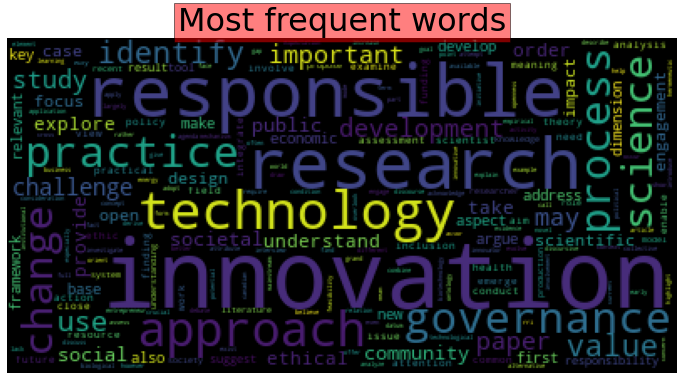

In [63]:
Analyzer_data.show_wordcloud(data_for_WC)

In [105]:
import numpy as np
select_rows = np.array(df_data_jri['Issue'] == 1)

Get most frequent author

Get most frequent words

Get most frequent words by Volume

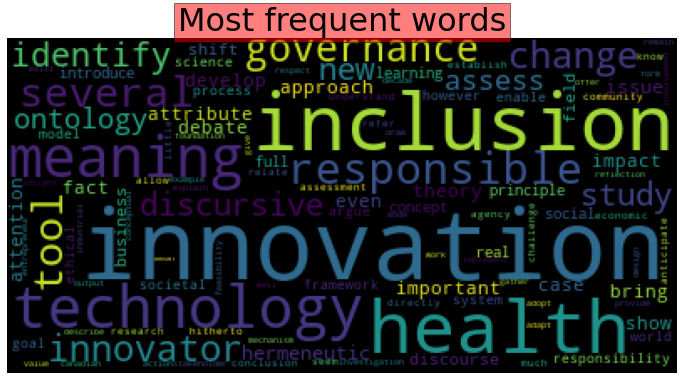

In [106]:
data_for_WC = Analyzer_data.prepare_data_for_WC(Analyzer_data.tfidf_DTM[selected_rows], Analyzer_data.vectorized.vocabulary_)
Analyzer_data.show_wordcloud(data_for_WC, title_in_plot = "Most frequent words by issue")